`Aim:` *Notebook for the purpose of Climate Risk Assessment lecture:* `Xarray and Simple Plotting`

`Author:` Mubashshir Ali

# Imports

In [1]:
# importing libraries as an alias so that we know which function belongs to which library
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np



# Plotting a simple canvas

Let's first plot a simple canvas on which we will draw figures later-on

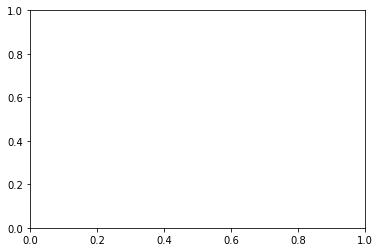

In [2]:
fig = plt.figure()
ax = plt.axes()

You can use `shift` + `tab` key to view the syntax of a function and other options it provides. Test it below.

In [3]:
plt.figure();


<Figure size 432x288 with 0 Axes>

Now, let's plot a simple function, the classical `sine` curve example

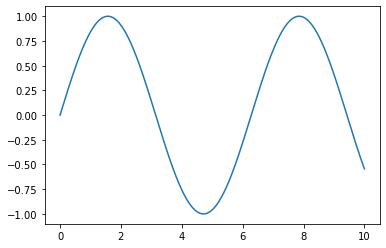

In [4]:
# create an array of points
x = np.linspace(0, 10, 1000) # use shift + tab to see the syntax
y = np.sin(x) # our function

# lets create our canvas as we did above
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)

This could also be plotted lazily in just one line...

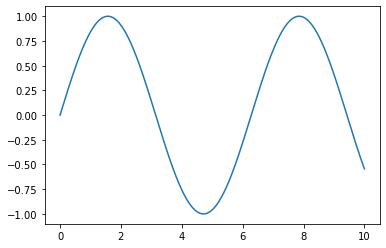

In [5]:
plt.plot(x, np.sin(x))

## Making nicer plots with seaborn

In [6]:
import seaborn as sns
sns.set(style='whitegrid') # sets default plotting styles, check contextual help for more options

In [ ]:
# setting color palette
#sns.set_palette(palette='tab20')

**Same plot as above**

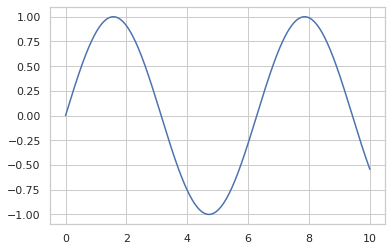

In [7]:
plt.plot(x, np.sin(x))

## Ploting multiple lines

In [ ]:
# lets do the lazy ploting of multiple lines
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

Note that matplotlib automatically assigned different colours. Pretty smart, right? What if you don't like those colours? Let's see how we can customize it...

## Adjusting colors and linestyles

In [ ]:
plt.plot(x, np.sin(x - 0), color='blue', linestyle='-')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g', linestyle='--')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75', linestyle='-.')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44', linestyle=':')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 and 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

**Task:** Find a website with a list of HTML color names

# Xarray

As you know by now the climate model data is stored in `NetCDF` format which is a special way of storing multi-dimensional data. We will use a python library called `xarray` which is specifically designed to make our life easier to handle multi-dimensional data.

Lets import the libary as an alias

In [8]:

import xarray as xr
# library to work with climate model data format

In [9]:
Image(url='http://xarray.pydata.org/en/stable/_images/dataset-diagram.png')


This is how a multi-dimensional dataset looks like.

## Xarray Dataset

In [10]:
# file to be plotted
# Adapt it as per your need

file1 = '/climriskdata/EUR-11N/ICHEC-EC-EARTH_SMHI-RCA4_v1/rcp85/tas/reduced_tas_EUR-11_ICHEC-EC-EARTH_rcp85_r12i1p1_SMHI-RCA4_v1_day_20710101-20751231_LL.nc'

In [11]:
# lets load the data by using open_dataset function of xarray

ds1 = xr.open_dataset(file1)
ds1

/storage/homefs/ch21o450/.local/lib/python3.9/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'rasterio' loading failed:
cannot import name 'NDArray' from 'numpy.typing' (/software.el7/software/SciPy-bundle/2021.05-foss-2021a/lib/python3.9/site-packages/numpy/typing/__init__.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


FileNotFoundError: [Errno 2] No such file or directory: b'/climriskdata/EUR-11N/ICHEC-EC-EARTH_SMHI-RCA4_v1/rcp85/tas/reduced_tas_EUR-11_ICHEC-EC-EARTH_rcp85_r12i1p1_SMHI-RCA4_v1_day_20710101-20751231_LL.nc'

------------------------------------------------------------------------------------
Here, you can see one of the reasons why `NetCDF` format is used. It presevers the metadata like standard name, units etc.

What are the dimensions of the tas variable? 

`Note:` If your data file has only one variable then one can also use `xr.open_datarray()` to open the file 

## DataArray/Data variables

Data Array is the actual data which the dataset holds. It can be a N-D numpy array. A dataset can hold multiple data variables. 

We see that this dataset has variables called `time_bnds` and `tas`

Every `DataArray` contains:
    
* `dimensions`: Eg, lat, lon, time
* `coordinates`: labels of each point in the form of a Python-dictionary
* `attributes`: Metadata

## Difference between dimensions and coordinates

Coordinates are labels to your dimensions. This will be more clear when we look at selecting data examples

## DataArray properties

In [ ]:
ds1.tas.name

In [ ]:
ds1.tas.data

In [ ]:
ds1.tas.dims

In [ ]:
ds1.tas.coords

In [ ]:
ds1.tas.attrs

## Different Ways of Selecting Data

Basic positional based indexing same as in numpy works, but one has to know the specific position to extract the data

In [ ]:
ds1.tas[0,1,1] # gives the time=0, lat=1, lon=1 position respectively

In [ ]:
# index style selecting
ds1.tas.isel(time=0)

---------------------------------------------------------------------------------------
Another easy way to select the data by specifying the date as a string using `sel` method. This is label based selection which is possible thanks to `coordinates` in our data. It works on the principle of python dictionaries.

In [ ]:

ds1.tas.sel(time='2071-05-15 12:00') 

In [ ]:
# assigning a variable name to our data for easy access
data_to_plot = ds1.tas.sel(time='2071-05-15 12:00')

In [ ]:
# ploting it, just one line
data_to_plot.plot()

Here, **we see how xarray makes our life so much easier for quick analysis.** We didn't have to specify a map or axis. It does everything intelligently in the background for us. This saves a lot of time for analysis.

This is just one of the many powerful features which xarray offers.

**You can also do everything above in just one line using Python's powerful Object-oriented language features** 

In [ ]:
# selecting and plotting the data in one line
ds1.tas.isel(time=0).plot(); # add semicolon to suppress text output, depends on individual taste
plt.title('My plot');

In [ ]:
# selecting lat, lon values
# quick time series plot for Bern
ds1.tas.sel(lat=46.9, lon=7.4, method='nearest').plot();

### Multiple plots

In [ ]:
## first we select data to plot
## we can select multiple time-steps using slice function
temp = ds1.tas.sel(time=slice('2071-05-15', '2071-05-18' ))
temp # print preview of our data

__Since, we have 4 time steps, we can plot it in a _2x2_ fashion__

In [ ]:
temp.plot(col='time',col_wrap=2);

## Calling-basic numpy functions

In [ ]:
ds1.tas.min()

In [ ]:
ds1.tas.max()

In [ ]:
# applying along a specific dimension
ds1.tas.min(dim='time')

In [ ]:
ds1.tas.min(dim='time').plot()

**These numpy functions are also now directly supported in the latest xarray version**

In [ ]:
np.min(ds1.tas)

## Modyfying values inplace

In [ ]:
# changing into deg Celsius
ds1.tas.values = ds1.tas.values - 273.15

Be careful when modifying data like that because the metadata says temperature is in Kelvin. So let's correct the meta data

In [ ]:
ds1.tas.attrs

In [ ]:
ds1.tas.attrs['units'] = 'degC'

In [ ]:
ds1.tas.attrs

In [ ]:
# check again
ds1.tas

In [ ]:
# To avoid confusion save it as a separate variable when you modify things inplace

tas_in_degC = ds1.tas - 273.15

# now the new variable is just an xarray dataarray

In [ ]:
# now the new variable is just an xarray dataarray
type(tas_in_degC)

In [ ]:
type(ds1)

## Saving file to disk

Once you have your `data_to_plot` file, it is better to save the file to disk especially if the calculations to produce the file took a while.


In [ ]:
data_to_plot

In [ ]:
out_file = '/home/mali/workdir/data_to_plot.nc' # change it to your directory
data_to_plot.to_netcdf(out_file)

# Common Error Handling

## Name error

In [12]:
ds

NameError: name 'ds' is not defined

In [ ]:
ds1.tas()

## Key Error

In [ ]:
ds1.sel(time='2000-01-01')

## Value error

In [ ]:
int(4.5)

In [ ]:
int("cat") 

In [ ]:
xr.open_dataarray(file1)

## Type Error

Common cause can be calling an object which is not a function.

In [ ]:
ds1.tas()

## Dealing with Errors

* Asking Google for help
* Looking up on stackoverflow for FAQs

For example, Google this: `How to change the range of the x-axis and y-axis python?`

You will most likely see the following [stackoverflow answer](https://stackoverflow.com/questions/29337123/how-to-change-the-range-of-the-x-axis-and-y-axis-in-matlibplot)

# Closing and deleting dataset

In [ ]:
ds1.close()
del ds1 

It will only delete ds1 variable, it won't delete the original data stroed on disk. Note: Xarray never modifies original data on the disk in all the operations we looked above. 

# References & Further Reading
[xarray](http://xarray.pydata.org/)

[Python Data Science Handbook - Visualization](https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html)